# Google Stock Predictor - LSTM

Predicting upwords/downwords trends

## Part 1 - Data Preprocessing

### Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv') # Data from 2012 to 2016
training_set = dataset_train.iloc[:, 1:2].values # Taking values [:] representing all ,1:2 representing first column.

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler # Applying normalization
sc = MinMaxScaler(feature_range = (0, 1)) # values btw 0 to 1
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

Meaning the RNN at each time t will look behind 60 days of stock price and predict the output i.e learning from previouss 60 timesteps. prediction for time t+1. 60 came by experimentation. Approx 3 months as per data.

In [6]:
X_train = []
y_train = []
for i in range(60, 1258): # Hence for loop starts form 60.
    X_train.append(training_set_scaled[i-60:i, 0]) # appending 60 days before data and column 0. (0 to 59)
    y_train.append(training_set_scaled[i, 0]) # ith index 60.
X_train, y_train = np.array(X_train), np.array(y_train) # list to numpy array for accepting in RNN Training.

### Reshaping

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# Example of adding a new dimension to the data structure we created. Here you can add more dimensions but for this project we will only use open.
# Go to keras documentation for adding dimension and how to add. https://keras.io/api/layers/recurrent_layers/

# 3D tensor --> batch size, timestamps, no.of indicators (eg. Open)

# Here we have used 1 at the end beacuse we are only using 1 indicator this can be changed as per needs.

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

Droput and Regularization added to avoid overfitting and giving best results.

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [9]:
regressor = Sequential() # called regressor beacuse we are predicting some continuous values.

### Adding the first LSTM layer and some Dropout regularisation

Dropout and regularization to avoid overfitting.

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 3 inputs expected (no.of.neurons, return sequence = true (to pass values back in LSTM layer (default value is false hence not added in last LSTM later)), input shape of the data).
# in input shaper 3 parameters are taken, first is taken into account hence here we give only 2.
# High no. of neurons beacuse stock price predictions is complex task.
regressor.add(Dropout(0.2))
# Dropout regularization.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [11]:
# For the next layers we dont need to specify the input shape.
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50)) # no need to return sequence here.
regressor.add(Dropout(0.2))

### Adding the output layer

In [14]:
regressor.add(Dense(units = 1)) # Only one value of stock price for prediction. ( Classic Fully Connected Layer.)

### Compiling the RNN

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # Compiling the Rnn with the best Optimizer and MSE because of regression problem.
# generally for RNNs, RMSProp optimizer is used but here adam performs better so it is used. Check keras documentation.

### Fitting the RNN to the Training set

In [16]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - loss: 0.0857
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0066
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0060
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0053
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0061
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0043
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0046
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0048
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0050
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0042
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0042
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0048
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0043
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0040
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv') # Stock prices form 2012 to 2016.
real_stock_price = dataset_test.iloc[:, 1:2].values # Selecting the first column. [:] for all the values , 1:2 to take first column as indexing in python 2 is ignored.

### Getting the predicted stock price of 2017

In [18]:
# this is prediction of Janaury 2017.
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) # concat open from train and test.
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values # Getting all the values in input substracting the test data.
inputs = inputs.reshape(-1,1) # Reshape numpy array (one column)
inputs = sc.transform(inputs) # Scaling inputs for using in LSTM
X_test = []
for i in range(60, 80): # 20 finanacial days in a month hence taken 20 for looping. (xtest has 20 values.)
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # changing shape.
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) # inverse transform to get the actual values.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step


### Visualising the results

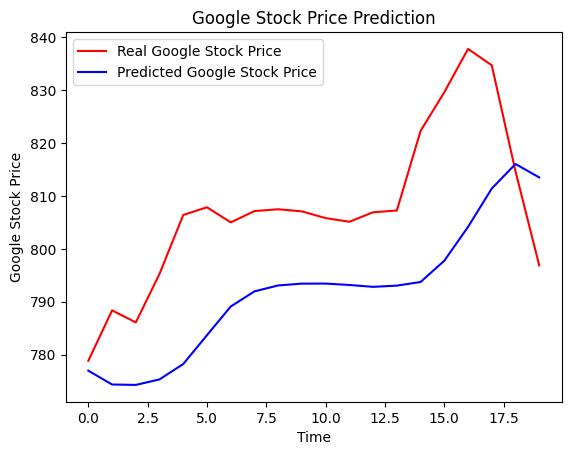

In [19]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()